## Sumbit example

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files

uploaded = files.upload()

data = pd.read_csv('train.csv')

Saving train.csv to train (4).csv


In [3]:
data.head()

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838


Есть категориальный признак. Линейная регрессия не может его обработать просто так.

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
data['category'].unique()

array(['ecom', 'information_source', 'news', 'porn', 'social'],
      dtype=object)

In [6]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(data[['category']])
onehot_encoded = encoder.transform(data[['category']])
onehot_df = pd.DataFrame(onehot_encoded, columns=encoder.categories_[0])
data = data.join(onehot_df, lsuffix='old', rsuffix='new')
data = data.drop('category', axis=1)

In [7]:
data.head()

,Unnamed: 0,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration,ecom,information_source,news,porn,social
0,6622,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072,1.0,0.0,0.0,0.0,0.0
1,2047,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816,0.0,1.0,0.0,0.0,0.0
2,1118,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135,0.0,1.0,0.0,0.0,0.0
3,4992,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095,0.0,0.0,1.0,0.0,0.0
4,9970,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838,0.0,1.0,0.0,0.0,0.0


Надо поработать с датами

In [8]:
today = pd.to_datetime('today')
data['date_of_registration'] = pd.to_datetime(data['date_of_registration'])
data['days_since_registration'] = (today - data['date_of_registration']).dt.days
data.drop(columns='date_of_registration')

,Unnamed: 0,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,ecom,information_source,news,porn,social,days_since_registration
0,6622,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,1.0,0.0,0.0,0.0,0.0,1644
1,2047,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,0.0,1.0,0.0,0.0,0.0,93
2,1118,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,0.0,1.0,0.0,0.0,0.0,100
3,4992,89534.0,924.0,0,834,0,0,2.149243,-0.093360,0.0,0.0,1.0,0.0,0.0,40
4,9970,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,0.0,1.0,0.0,0.0,0.0,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,361,1468601.0,474524.0,0,61307,83928,16841,4.191481,0.017470,0.0,1.0,0.0,0.0,0.0,489
7996,2621,93172.0,6418.0,0,3418,705,0,3.745192,-0.019069,0.0,1.0,0.0,0.0,0.0,91
7997,2605,82916.0,0.0,0,4302,1718,1007,5.837475,-0.061523,0.0,1.0,0.0,0.0,0.0,126
7998,1231,823896.0,105666.0,0,0,2892,267,11.994037,0.131620,0.0,0.0,0.0,0.0,1.0,498


In [9]:
data['complaints_count'] = pd.to_numeric(data['complaints_count'], errors='coerce')

In [10]:
data.isnull().sum()

,0
Unnamed: 0,0
clicks,273
likes,376
buys,0
4xx_errors,0
5xx_errors,0
complaints_count,884
average_dwelltime,0
source_attractiveness,0
date_of_registration,0


Как видно, пропуски есть в довольно отвественных категориях. Их заполнение опасно, так как может исказить реальность. И всё же попробуем заполнить:

In [11]:
from sklearn.impute import KNNImputer

In [12]:
data.replace('-', np.nan, inplace=True)

imputer = KNNImputer(n_neighbors=2)
data[['clicks', 'likes', 'complaints_count']] = imputer.fit_transform(data[['clicks', 'likes', 'complaints_count']])

In [13]:
data.isnull().sum()

,0
Unnamed: 0,0
clicks,0
likes,0
buys,0
4xx_errors,0
5xx_errors,0
complaints_count,0
average_dwelltime,0
source_attractiveness,0
date_of_registration,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               8000 non-null   int64         
 1   clicks                   8000 non-null   float64       
 2   likes                    8000 non-null   float64       
 3   buys                     8000 non-null   int64         
 4   4xx_errors               8000 non-null   int64         
 5   5xx_errors               8000 non-null   int64         
 6   complaints_count         8000 non-null   float64       
 7   average_dwelltime        8000 non-null   float64       
 8   source_attractiveness    8000 non-null   float64       
 9   date_of_registration     8000 non-null   datetime64[ns]
 10  ecom                     8000 non-null   float64       
 11  information_source       8000 non-null   float64       
 12  news                     8000 non-

Информация не потеряна!

<Axes: >

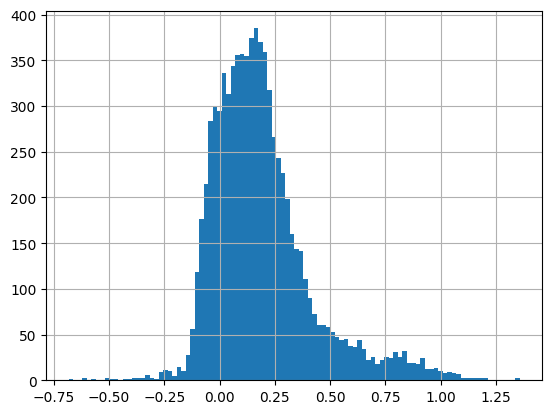

In [15]:
data['source_attractiveness'].hist(bins=100)

Распределение довольно близко к нормальному! Эта особенность благоприятна для обучения.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data.columns

Index(['Unnamed: 0', 'clicks', 'likes', 'buys', '4xx_errors', '5xx_errors',
       'complaints_count', 'average_dwelltime', 'source_attractiveness',
       'date_of_registration', 'ecom', 'information_source', 'news', 'porn',
       'social', 'days_since_registration'],
      dtype='object')

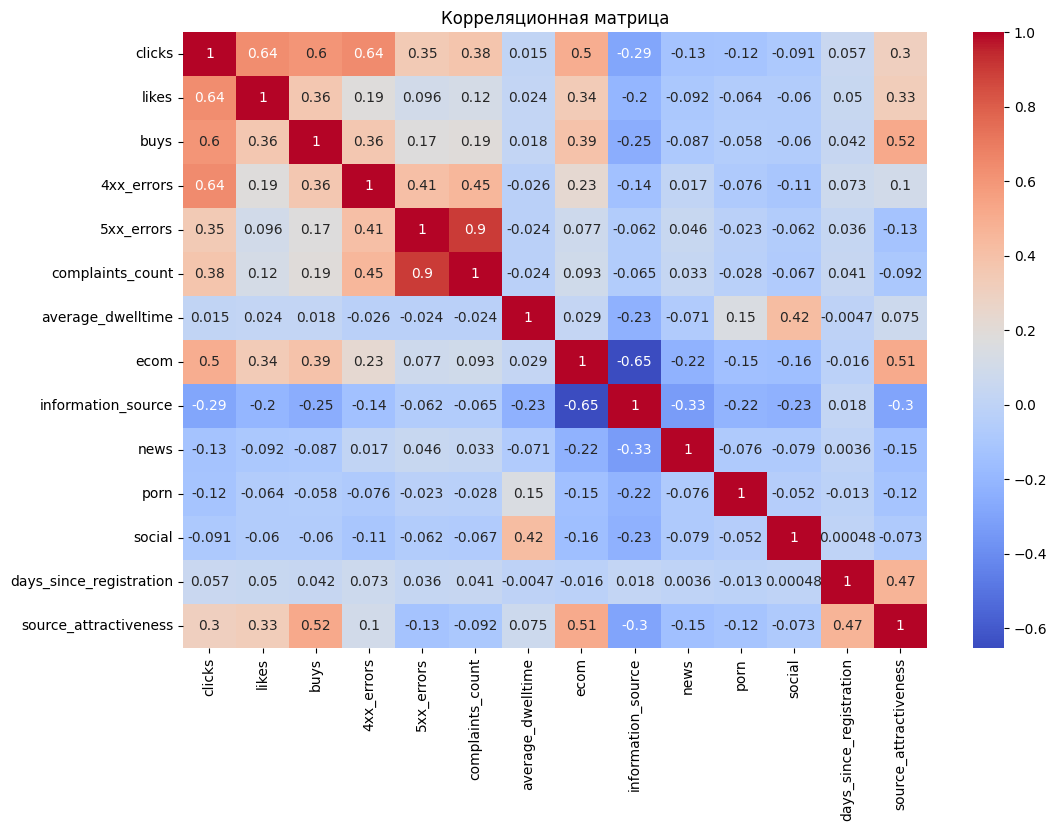

In [18]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[['clicks', 'likes', 'buys', '4xx_errors', '5xx_errors',
       'complaints_count', 'average_dwelltime', 'ecom', 'information_source', 'news', 'porn',
       'social', 'days_since_registration', 'source_attractiveness']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Из матрицы корреляций видно, что привлекательности больше, если:
1. Сайт был создан раньше;
2. На нём было совершено больше покупок;
3. Это сайт направленности электронной коммерции.

В то же время, менее привлекательны сайты:
1. С направленностью на информационные ресурсы (включая новости);
2. С ошибками 5xx;
3. С жалобами.

Другие интересные особенности:
1. Покупки и лайки, разумеется, тесно связаны с кликами;
2. Количество жалоб и ошибок 5xx очень сильно связаны;
3. Сайты электронной коммерции имеют потенциал на наибольшее количество кликов, лайков и покупок. Также у них наибольшее количество ошибок: как связанных с клиентом, так и с сервером.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
X = data[['clicks', 'likes', 'buys', '4xx_errors', '5xx_errors', 'complaints_count', 'average_dwelltime', 'days_since_registration',
          'ecom', 'information_source', 'news', 'porn', 'social']]
y = data['source_attractiveness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
mean_squared_error(y_test, y_pred)

0.017264172905893296

Это довольно хороший MSE

In [22]:
r2_score(y_test, y_pred)

0.6910464538107775

Это довольно хороший R2. Он показывает, что модель объясняет  более двух третей вариации желаемой переменной.

In [23]:
model.coef_

array([-1.30127520e-08,  1.93420508e-08,  4.58581615e-08,  2.19575424e-08,
       -5.82900976e-07,  2.62920636e-07,  1.87301185e-03,  1.46702708e-04,
        1.82576510e-01, -8.43970937e-03, -3.26110880e-02, -8.36040203e-02,
       -5.79216927e-02])

In [24]:
model.intercept_

0.035742339281288005

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

Перед регулированием необходимо стандартизировать данные:

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train
X_test

array([[-0.32678418, -0.2974758 , -0.2516569 , ..., -0.33302461,
        -0.23102118,  4.3897916 ],
       [-0.50552763, -0.2974758 , -0.2516569 , ..., -0.33302461,
        -0.23102118,  4.3897916 ],
       [ 5.67653002,  3.56727714, -0.2516569 , ..., -0.33302461,
        -0.23102118, -0.22780125],
       ...,
       [-0.45754168, -0.2974758 , -0.2516569 , ..., -0.33302461,
        -0.23102118,  4.3897916 ],
       [-0.51231589, -0.2974758 , -0.2516569 , ..., -0.33302461,
        -0.23102118, -0.22780125],
       [-0.22915162, -0.22323893, -0.2516569 , ..., -0.33302461,
        -0.23102118, -0.22780125]])

In [28]:
ridge = Ridge(alpha=0.1, fit_intercept=True)
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)

In [29]:
y_ridge

array([0.09187827, 0.26887013, 0.05785801, ..., 0.04785341, 0.04122154,
       0.11540925])

In [30]:
ridge.coef_

array([-0.06136267,  0.03847765,  0.10530309,  0.00347639, -0.04749528,
        0.00410195,  0.01831814,  0.10608458,  0.06491396, -0.02507282,
       -0.02227917, -0.02748255, -0.02157598])

In [31]:
ridge.intercept_

0.18882487391206923

In [32]:
mean_squared_error(y_test, y_ridge)

0.01726425251209938

In [33]:
r2_score(y_test, y_ridge)

0.6910450292062046

## Final model submit function

Скомпилируем предыдущие работы по обучению моделей в один блок:

In [34]:
data_path = 'train.csv'
train_data = pd.read_csv(data_path)

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(train_data[['category']])
onehot_encoded = encoder.transform(train_data[['category']])
onehot_df = pd.DataFrame(onehot_encoded, columns=encoder.categories_[0])
train_data = train_data.join(onehot_df, lsuffix='old', rsuffix='new')
train_data = train_data.drop('category', axis=1)

today = pd.to_datetime('today')
train_data['date_of_registration'] = pd.to_datetime(train_data['date_of_registration'])
train_data['days_since_registration'] = (today - train_data['date_of_registration']).dt.days
train_data.drop(columns='date_of_registration')

train_data['complaints_count'] = pd.to_numeric(data['complaints_count'], errors='coerce')

data.replace('-', np.nan, inplace=True)

imputer = KNNImputer(n_neighbors=2)
train_data[['clicks', 'likes', 'complaints_count']] = imputer.fit_transform(data[['clicks', 'likes', 'complaints_count']])

X_train = train_data[['clicks', 'likes', 'buys', '4xx_errors', '5xx_errors', 'complaints_count', 'average_dwelltime',
          'ecom', 'information_source', 'news', 'porn', 'social', 'days_since_registration']]
y_train = train_data['source_attractiveness']

model = LinearRegression()
model.fit(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

ridge = Ridge(alpha=0.1, fit_intercept=True)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [35]:
def predict(data_path):
    data = pd.read_csv(data_path)

    data_c = data.copy()

    encoder = OneHotEncoder(sparse_output=False)
    encoder.fit(data_c[['category']])
    onehot_encoded = encoder.transform(data_c[['category']])
    onehot_df = pd.DataFrame(onehot_encoded, columns=encoder.categories_[0])
    data_c = data_c.join(onehot_df, lsuffix='old', rsuffix='new')
    data_c = data_c.drop('category', axis=1)

    today = pd.to_datetime('today')
    data_c['date_of_registration'] = pd.to_datetime(data_c['date_of_registration'])
    data_c['days_since_registration'] = (today - data_c['date_of_registration']).dt.days

    data_c = data_c.drop(columns='date_of_registration')
    data_c = data_c.drop(columns='ID')

    data_c['complaints_count'] = pd.to_numeric(data_c['complaints_count'], errors='coerce')

    data_c.replace('-', np.nan, inplace=True)

    imputer = KNNImputer(n_neighbors=2)
    data_c[['clicks', 'likes', 'complaints_count']] = imputer.fit_transform(data_c[['clicks', 'likes', 'complaints_count']])

    data_c = scaler.transform(data_c)

    predictions = ridge.predict(data_c)

    data = {
        "source_attractiveness": predictions
    }

    submit = pd.DataFrame(data)
    submit.to_csv('submission.csv', index_label="ID")

In [36]:
uploaded = files.upload()

data = pd.read_csv('test.csv')

Saving test.csv to test (4).csv


In [37]:
predict('test.csv')

In [38]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>